In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import MY_bcilib as mybci

## **<font color = yellow>文件读取载入预处理</font>**

### **<font color = carmine>创建EPOCH文件</font>**

In [2]:
'''
read_raw_filename = 'data/B0101T.gdf'
save_epo_filename = 'data/B0101T_epo.fif'

raw = mne.io.read_raw_gdf(read_raw_filename, preload=True)

raw.drop_channels(['EOG:ch01','EOG:ch02','EOG:ch03'])

# 768 --- start a trial
custom_mapping = {'768':2}
(events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)
#  3s开始为时间cue
raw_epochs = mne.Epochs(raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=-0.5,tmax=7)

evoked = raw_epochs.average()
evoked.plot(time_unit='s')

raw_epochs.save(save_epo_filename)
'''

"\nread_raw_filename = 'data/B0101T.gdf'\nsave_epo_filename = 'data/B0101T_epo.fif'\n\nraw = mne.io.read_raw_gdf(read_raw_filename, preload=True)\n\nraw.drop_channels(['EOG:ch01','EOG:ch02','EOG:ch03'])\n\n# 768 --- start a trial\ncustom_mapping = {'768':2}\n(events_from_annot,event_dict) = mne.events_from_annotations(raw, event_id=custom_mapping)\n#  3s开始为时间cue\nraw_epochs = mne.Epochs(raw, events=events_from_annot, event_id=event_dict,proj=True,baseline=(None, 0), preload=True,tmin=-0.5,tmax=7)\n\nevoked = raw_epochs.average()\nevoked.plot(time_unit='s')\n\nraw_epochs.save(save_epo_filename)\n"

### **<font color = carmine>测试集数据标签读取</font>**

In [3]:
from scipy.io import loadmat
 
raw_label_data = loadmat('data/B0104E.mat')
B0104E_label = raw_label_data['classlabel']

raw_label_data = loadmat('data/B0105E.mat')
B0105E_label = raw_label_data['classlabel']

In [156]:
test_label = np.concatenate((B0104E_label,B0105E_label))

test_label = np.array(test_label,dtype=np.float32) - 1
test_label = test_label.reshape(-1,)

print(test_label.shape)

(320,)


### **<font color = carmine>读取测试数据epochs</font>**
采样率250hz   测试数据从-0.5-7s数据，cue开始时间为3s ,考虑的数据长度为 -3.5-7s

In [5]:
sample_rate = 250
base_time = -0.5
cue_time = 3

cue_start = int((cue_time - base_time) * sample_rate)

In [6]:
B104E_epochs = mne.read_epochs('data/B0104E_epo.fif')
B104E_data = B104E_epochs.get_data()
B104E_data = B104E_data[:,:,cue_start:]

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0104E_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated


In [7]:
B105E_epochs = mne.read_epochs('data/B0105E_epo.fif')
B105E_data = B105E_epochs.get_data()
B105E_data = B105E_data[:,:,cue_start:]

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0105E_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated


In [8]:
test_data = np.concatenate((B104E_data,B105E_data))
print(test_data.shape)

(320, 3, 1001)


### **<font color = carmine>读取训练集数据以及标签</font>**

读取训练集标签

In [9]:
raw_label_data = loadmat('data/B0101T.mat')
B0101T_label = raw_label_data['classlabel']

raw_label_data = loadmat('data/B0102T.mat')
B0102T_label = raw_label_data['classlabel']

raw_label_data = loadmat('data/B0103T.mat')
B0103T_label = raw_label_data['classlabel']

In [155]:
train_label = np.concatenate((B0101T_label,B0102T_label))
train_label = np.concatenate((train_label,B0103T_label))

train_label = np.array(train_label,dtype=np.float32) - 1
train_label = train_label.reshape(-1,)

print(train_label.shape)


(400,)


读取训练集数据

In [11]:
B101T_epochs = mne.read_epochs('data/B0101T_epo.fif')
B101T_data = B101T_epochs.get_data()
B101T_data = B101T_data[:,:,cue_start:]
print(B101T_data.shape)

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0101T_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
(120, 3, 1001)


In [12]:
B102T_epochs = mne.read_epochs('data/B0102T_epo.fif')
B102T_data = B102T_epochs.get_data()
B102T_data = B102T_data[:,:,cue_start:]
print(B102T_data.shape)

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0102T_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
120 matching events found
No baseline correction applied
0 projection items activated
(120, 3, 1001)


In [13]:
B103T_epochs = mne.read_epochs('data/B0103T_epo.fif')
B103T_data = B103T_epochs.get_data()
B103T_data = B103T_data[:,:,cue_start:]

Reading e:\19_BCIexperiment\02_CodeTest\MNE_TEST\data\B0103T_epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    7000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
160 matching events found
No baseline correction applied
0 projection items activated


In [14]:
train_data = np.concatenate((B101T_data,B102T_data))
train_data = np.concatenate((train_data,B103T_data))
print(train_data.shape)

(400, 3, 1001)


In [16]:
train_cls1_data = train_data[train_label==0,:,:]
train_cls2_data = train_data[train_label==1,:,:]
print('class 1 train data shape : ',train_cls1_data.shape)
print('class 2 train data shape : ',train_cls2_data.shape)

class 1 train data shape :  (200, 3, 1001)
class 2 train data shape :  (200, 3, 1001)


## **<font color = yellow>信号预处理</font>**

### **<font color = carmine>band-pass带通滤波</font>**

划分为7个频带   频带间隔4hz，起始频率为4hz ， 4-32hz 共7个频带

In [136]:
fre_band_num = 7
freband_train_data = np.zeros((fre_band_num,train_data.shape[0],train_data.shape[1],train_data.shape[2]))
freband_test_data = np.zeros((fre_band_num,test_data.shape[0],test_data.shape[1],test_data.shape[2]))


start_fre = 4
fre_stride = 4
for i in range(fre_band_num):
    s = start_fre + i * fre_stride
    e = s + fre_stride
    freband_train_data[i,:,:,:] = mybci.band_pass(trials = train_data,lo = s,hi = e,sample_rate = 250)
    freband_test_data[i,:,:,:] = mybci.band_pass(trials = test_data,lo = s,hi = e,sample_rate = 250)



trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)
trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)
trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)
trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)
trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)
trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)
trials_filter shape  (400, 3, 1001)
trials_filter shape  (320, 3, 1001)


## **<font color = yellow>特征提取</font>**

In [18]:
CSP_W = np.zeros((fre_band_num,3,3))

freband_train_data_cls1 = freband_train_data[:,train_label==0,:,:]
freband_train_data_cls2 = freband_train_data[:,train_label==1,:,:]

for i in range(fre_band_num):
    CSP_W[i,:,:] = mybci.cal_W(freband_train_data_cls1[i,:,:,:],freband_train_data_cls2[i,:,:,:])



两类的特征值lambda:
 [0.52209723 0.50443012 0.49427262]
Sb value is  [[ 0.49714184  0.01266042  0.0015625 ]
 [ 0.01266042  0.48704438 -0.0026816 ]
 [ 0.0015625  -0.0026816   0.49501381]]
reverse Sb value is  [[ 0.49714184  0.01266042  0.0015625 ]
 [ 0.01266042  0.48704438 -0.0026816 ]
 [ 0.0015625  -0.0026816   0.49501381]]
------------------------
两类的特征值lambda:
 [0.57727606 0.50039065 0.37518374]
Sb value is  [[0.52612111 0.05250871 0.02910025]
 [0.05250871 0.58988052 0.02051139]
 [0.02910025 0.02051139 0.43114792]]
reverse Sb value is  [[0.52612111 0.05250871 0.02910025]
 [0.05250871 0.58988052 0.02051139]
 [0.02910025 0.02051139 0.43114792]]
------------------------
两类的特征值lambda:
 [0.5473407  0.48740941 0.47303592]
Sb value is  [[ 0.49800284  0.02486919  0.01810597]
 [ 0.02486919  0.50264038 -0.02400113]
 [ 0.01810597 -0.02400113  0.49157076]]
reverse Sb value is  [[ 0.49800284  0.02486919  0.01810597]
 [ 0.02486919  0.50264038 -0.02400113]
 [ 0.01810597 -0.02400113  0.49157076]]
--------

训练集CSP特征提取

In [138]:
freband_train_csp_var =  np.zeros((fre_band_num,train_data.shape[0],train_data.shape[1]))
freband_train_raw_var =  np.zeros((fre_band_num,train_data.shape[0],train_data.shape[1]))

for i in range(fre_band_num):
    freband_train_csp_var[i,:,:] = abs(mybci.logvar(mybci.apply_mix(CSP_W[i,:,:],freband_train_data[i,:,:,:])))
    freband_train_raw_var[i,:,:] = abs(mybci.logvar(freband_train_data[i,:,:,:]))

print('freband_train_csp_var shape :',freband_train_csp_var.shape)


freband_train_csp_feat = np.zeros((fre_band_num,train_data.shape[0],2))

for i in range(fre_band_num):
    _ , freband_train_csp_feat[i,:,:] = mybci.cal_csp_feature(freband_train_csp_var[i,:,:],fea_num=[0,-1])

print('freband_train_csp_feat shape :',freband_train_csp_feat.shape)

freband_train_csp_var shape : (7, 400, 3)
freband_train_csp_feat shape : (7, 400, 2)


In [140]:
freband_train_csp_feat_conb = np.zeros((train_data.shape[0],2))

freband_train_csp_feat_conb = freband_train_csp_feat[0,:,:]
for i in range(6):
    freband_train_csp_feat_conb = np.concatenate((freband_train_csp_feat_conb,freband_train_csp_feat[i+1,:,:]),axis=1)

测试集CSP特征提取

In [139]:
freband_test_csp_var =  np.zeros((fre_band_num,test_data.shape[0],test_data.shape[1]))

for i in range(fre_band_num):
    freband_test_csp_var[i,:,:] = abs(mybci.logvar(mybci.apply_mix(CSP_W[i,:,:],freband_test_data[i,:,:,:])))

print('freband_train_csp_var shape :',freband_test_csp_var.shape)

freband_test_csp_feat = np.zeros((fre_band_num,test_data.shape[0],2))

for i in range(fre_band_num):
    _ , freband_test_csp_feat[i,:,:] = mybci.cal_csp_feature(freband_test_csp_var[i,:,:],fea_num=[0,-1])

print('freband_test_csp_feat shape :',freband_test_csp_feat.shape)

freband_train_csp_var shape : (7, 320, 3)
freband_test_csp_feat shape : (7, 320, 2)


In [141]:
freband_test_csp_feat_conb = np.zeros((test_data.shape[0],2))

freband_test_csp_feat_conb = freband_test_csp_feat[0,:,:]
for i in range(6):
    freband_test_csp_feat_conb = np.concatenate((freband_test_csp_feat_conb,freband_test_csp_feat[i+1,:,:]),axis=1)

数据分析：取两个csp特征

(3,)
(3,)
(3,)
(3,)


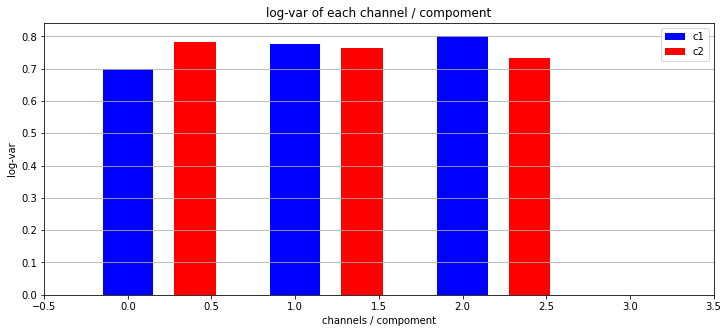

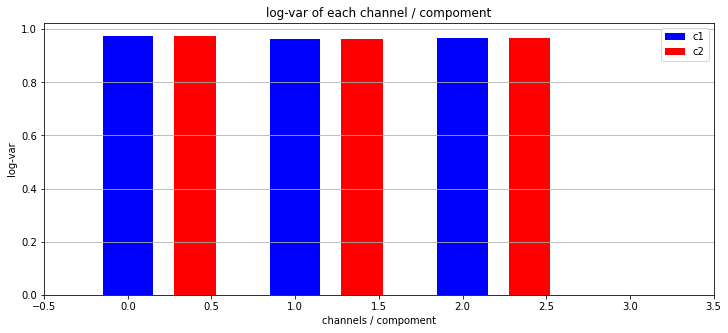

In [62]:
freband_train_csp_var[1,0:5,:]

mybci.plot_logvar(freband_train_csp_var[6,train_label==0,:],freband_train_csp_var[6,train_label==1,:])
mybci.plot_logvar(freband_train_raw_var[6,train_label==0,:]/30,freband_train_raw_var[6,train_label==1,:]/30)

In [43]:
train_label[0:5]

array([0, 1, 0, 1, 1], dtype=uint8)

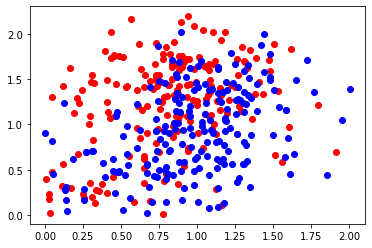

In [54]:
plt.scatter(freband_train_csp_var[1,train_label==0,0],freband_train_csp_var[1,train_label==0,-1],c='r')
plt.scatter(freband_train_csp_var[1,train_label==1,0],freband_train_csp_var[1,train_label==1,-1],c='b')

### **<font color = carmine>分类器输出分类结果</font>**

In [143]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from skfeature.function.statistical_based import f_score
from sklearn.preprocessing import StandardScaler

In [109]:
'''
n_samples = freband_train_csp_feat.shape[1]


# perform evaluation on classification task
num_fea = 14            # number of selected features
clf = svm.LinearSVC()    # linear SVM

clf.fit(freband_train_csp_feat_conb,train_label)


scores = cross_val_score(clf, freband_train_csp_feat_conb, train_label, cv=10)

score = f_score.f_score(freband_train_csp_feat_conb,train_label)


correct = 0
for train, test in ss:
    # obtain the f-score of each feature
    scores = cross_val_score(clf, freband_train_csp_feat_conb, train_label, cv=10)
    #score = f_score.f_score(freband_train_csp_feat_conb, train_label)

    # rank features in descending order according to score
    idx = f_score.feature_ranking(scores)

    # obtain the dataset on the selected features
    selected_features = freband_train_csp_feat_conb[:, idx[0:num_fea]]

    # train a classification model with the selected features on the training dataset
    clf.fit(selected_features[train], train_label[train])

    # predict the class labels of test data
    y_predict = clf.predict(selected_features[test])

    # obtain the classification accuracy on the test data
    acc = accuracy_score(train_label[test], y_predict)
    correct = correct + acc

# output the average classification accuracy over all 10 folds
print('Accuracy:', float(correct)/10)
'''

"\ncorrect = 0\nfor train, test in ss:\n    # obtain the f-score of each feature\n    scores = cross_val_score(clf, freband_train_csp_feat_conb, train_label, cv=10)\n    #score = f_score.f_score(freband_train_csp_feat_conb, train_label)\n\n    # rank features in descending order according to score\n    idx = f_score.feature_ranking(scores)\n\n    # obtain the dataset on the selected features\n    selected_features = freband_train_csp_feat_conb[:, idx[0:num_fea]]\n\n    # train a classification model with the selected features on the training dataset\n    clf.fit(selected_features[train], train_label[train])\n\n    # predict the class labels of test data\n    y_predict = clf.predict(selected_features[test])\n\n    # obtain the classification accuracy on the test data\n    acc = accuracy_score(train_label[test], y_predict)\n    correct = correct + acc\n\n# output the average classification accuracy over all 10 folds\nprint('Accuracy:', float(correct)/10)\n"

In [159]:
scaler = StandardScaler()
scaler.fit(freband_train_csp_feat_conb)
train_csp = scaler.transform(freband_train_csp_feat_conb)

clf = SVC(gamma='auto')  #

clf.fit(train_csp,train_label)

acc = 1 - (np.sum(abs(clf.predict(train_csp) - train_label)) / freband_train_csp_feat_conb.shape[0])

In [160]:

acc = 1 - (np.sum(abs(clf.predict(train_csp) - train_label)) / freband_train_csp_feat_conb.shape[0])
print('训练集上面的分类准确度为 : ',acc)

训练集上面的分类准确度为 :  0.8049999999999999


## **<font color = yellow>测试集提取CSP，并且预测结果</font>**

In [161]:
freband_test_csp_var =  np.zeros((fre_band_num,test_data.shape[0],test_data.shape[1]))

for i in range(fre_band_num):
    freband_test_csp_var[i,:,:] = abs(mybci.logvar(mybci.apply_mix(CSP_W[i,:,:],freband_test_data[i,:,:,:])))

In [162]:
test_csp = scaler.transform(freband_test_csp_feat_conb)

test_label = np.array(test_label,dtype=np.float32)
test_acc = 1 - (np.sum(abs(clf.predict(test_csp) - test_label)) / freband_test_csp_feat_conb.shape[0])
print('测试集的预测准确率为:',test_acc)

测试集的预测准确率为: 0.640625
